<a href="https://colab.research.google.com/github/bramyeon/sicss-happiness/blob/main/s3_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import geopandas as gp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# - Directory to Shared Drive
ROOT_DIR = '/content/drive/Shareddrives/SICSS_2024_groupproject/2_data'
DATA_DIR = 'data-korea/clean/'
DATA_DIR = os.path.join(ROOT_DIR, DATA_DIR)

In [7]:
# - Load the preprocessed dataset
ses_map2021_sub = gp.read_file(os.path.join(DATA_DIR, 'ses_map2021.shp'))

In [18]:
ses_map2021_sub.columns

Index(['SGG_NM_gug', 'gungu', 'happiness_score', 'happines_1',
       'TotalLivingPopulation', 'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5',
       'GDP', 'housing', 'avg_households', 'geometry'],
      dtype='object')

In [20]:
ses_map2021_sub.rename(columns={'happiness_': "happiness_score",
                                "happines_1": "happiness_ladder",
                                "TotalLivin": "TotalLivingPopulation",
                                "avg_househ": "avg_households"}, inplace=True)

ses_map2021_sub.head()

,SGG_NM_gug,gungu,happiness_score,happiness_ladder,TotalLivingPopulation,SO2,CO,Ozone,NO2,PM10,PM2.5,GDP,housing,avg_households,geometry
0,Jung-gu,Jung-gu,8.0,8.0,271742.081631,0.003348,0.475342,0.026351,0.026753,41.638356,20.665753,61342710,Free,1.583333,"POLYGON ((202072.448 552243.432, 202072.646 55..."
1,Jung-gu,Jung-gu,8.0,8.0,271742.081631,0.003348,0.475342,0.026351,0.026753,41.638356,20.665753,61342710,Lease,108.833333,"POLYGON ((202072.448 552243.432, 202072.646 55..."
2,Jung-gu,Jung-gu,8.0,8.0,271742.081631,0.003348,0.475342,0.026351,0.026753,41.638356,20.665753,61342710,Monthly rent with deposit,1033.750000,"POLYGON ((202072.448 552243.432, 202072.646 55..."
3,Jung-gu,Jung-gu,8.0,8.0,271742.081631,0.003348,0.475342,0.026351,0.026753,41.638356,20.665753,61342710,Monthly rent without deposit,1186.166667,"POLYGON ((202072.448 552243.432, 202072.646 55..."
4,Jung-gu,Jung-gu,8.0,8.0,271742.081631,0.003348,0.475342,0.026351,0.026753,41.638356,20.665753,61342710,Own house,13.250000,"POLYGON ((202072.448 552243.432, 202072.646 55..."


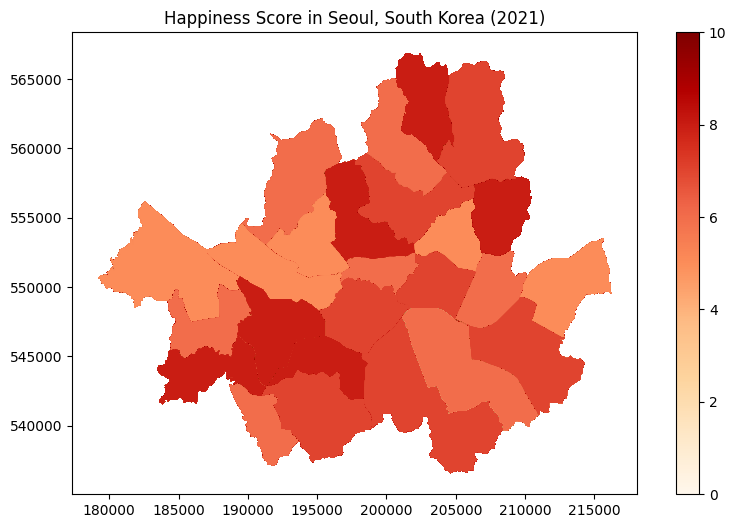

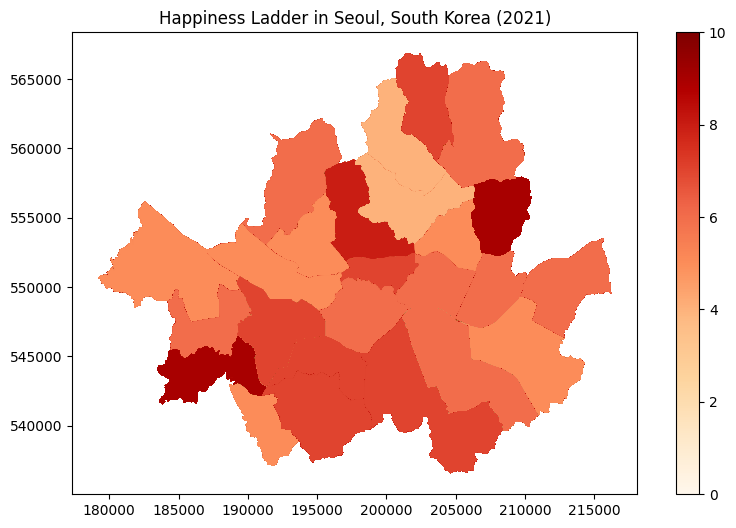

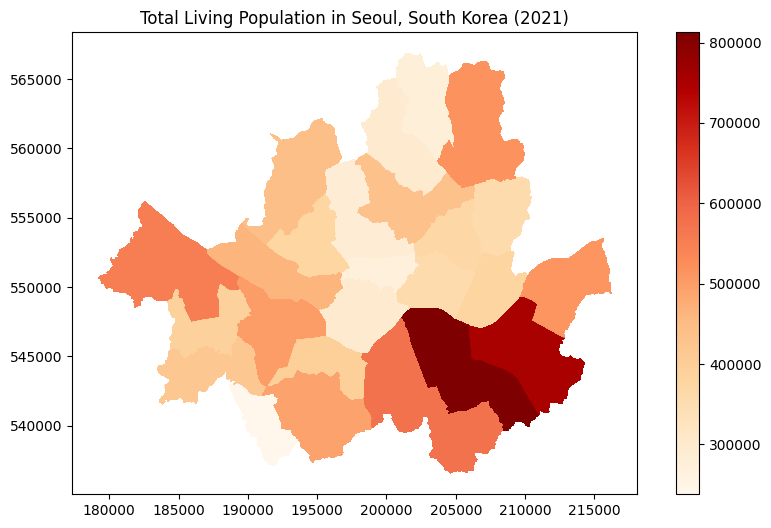

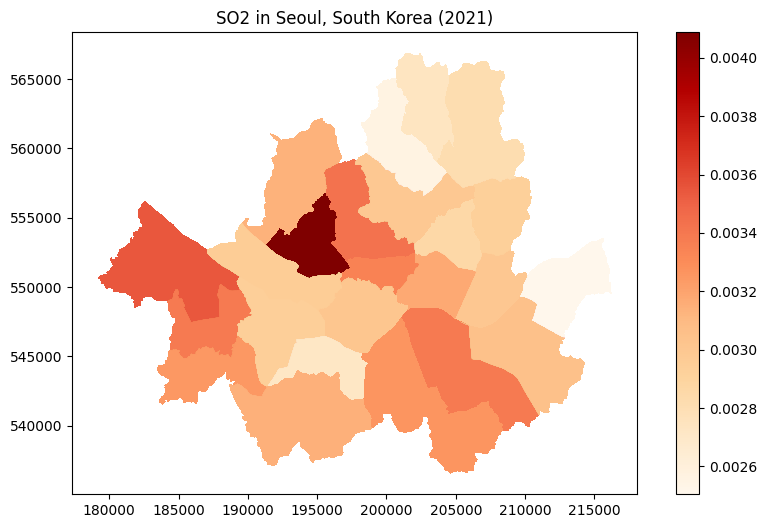

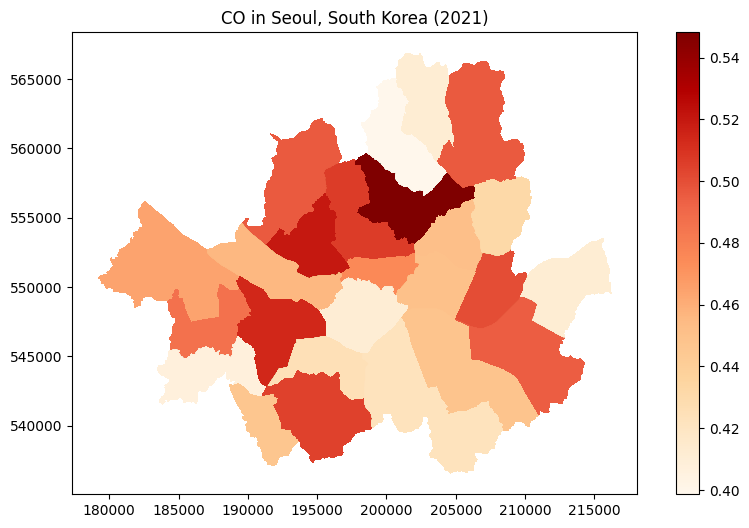

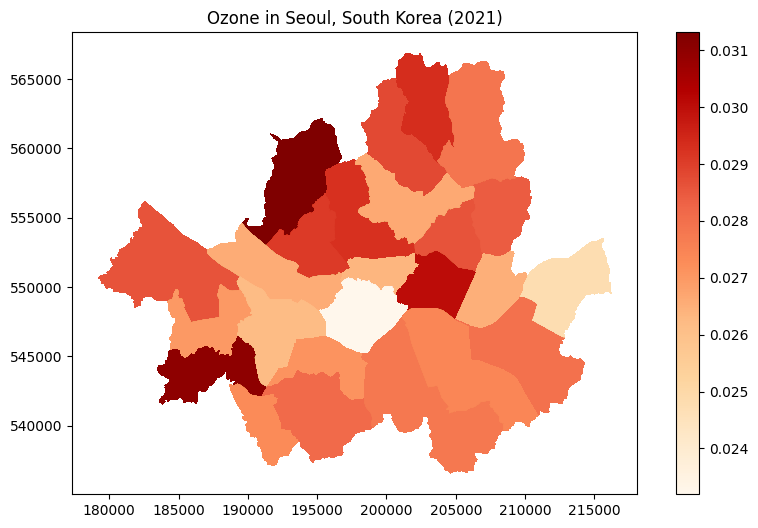

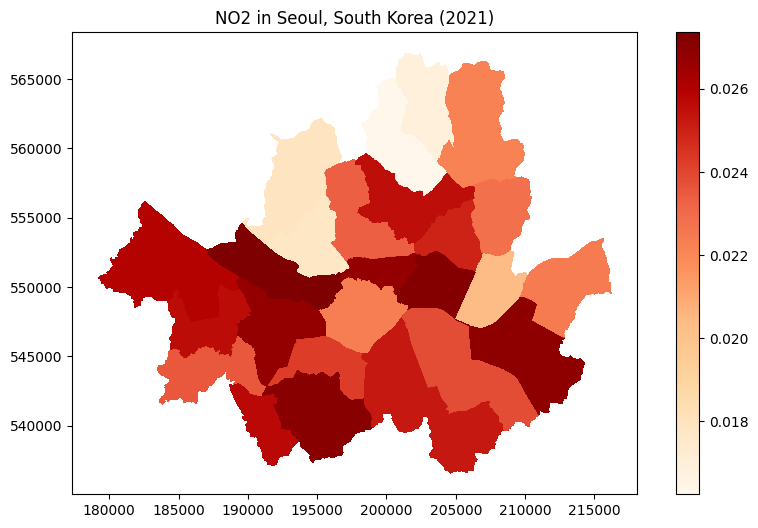

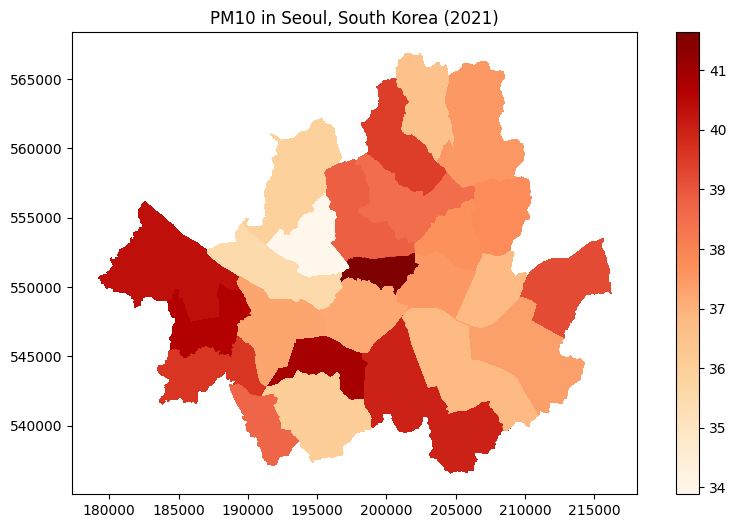

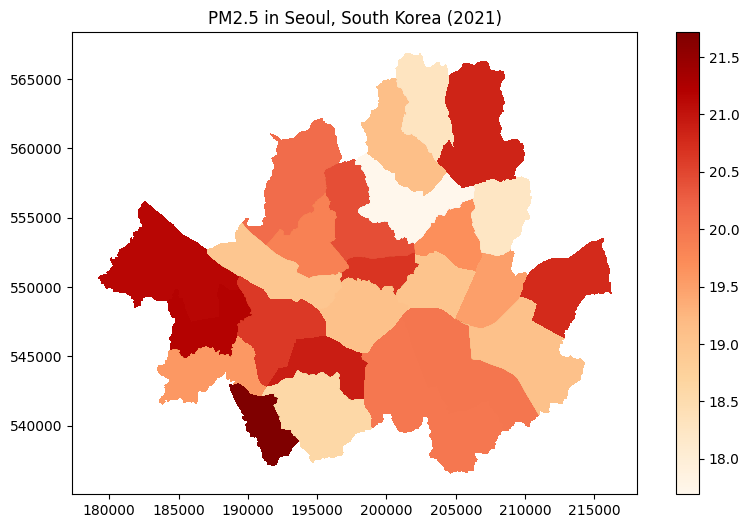

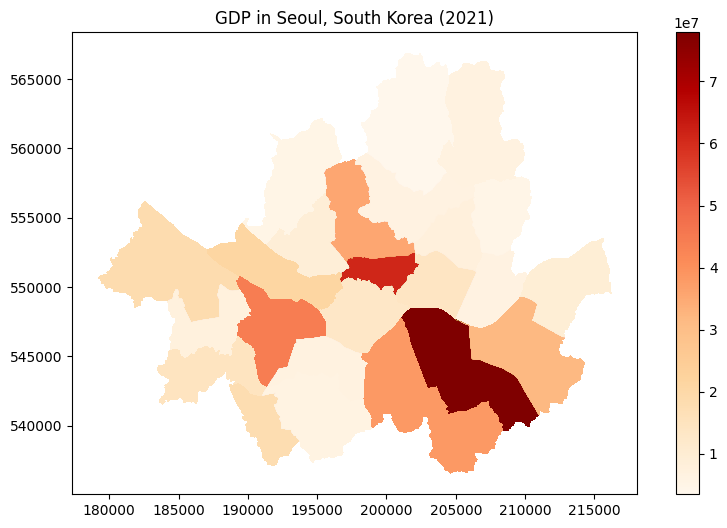

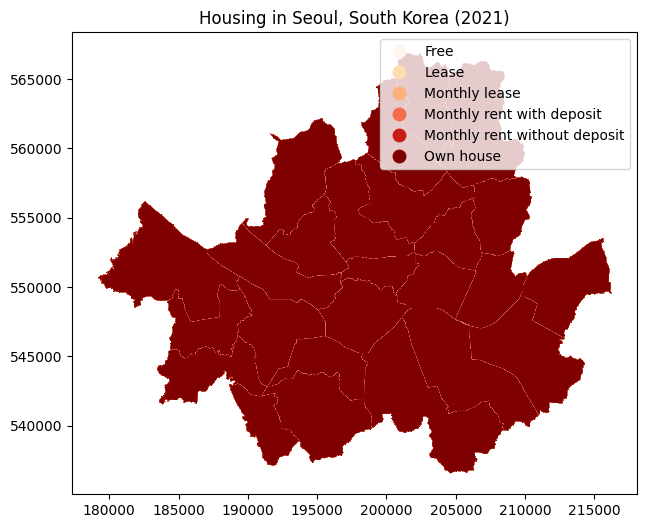

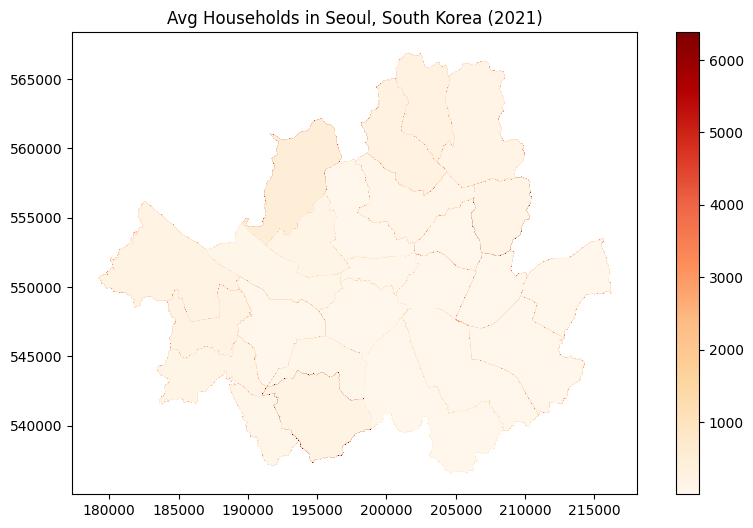

In [21]:
# List of columns to plot
columns_to_plot = ['happiness_score', 'happiness_ladder','TotalLivingPopulation',
        'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5', 'GDP','housing', 'avg_households']

# List of column titles
columns_list = ['Happiness Score', 'Happiness Ladder', 'Total Living Population',
                'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5', 'GDP','Housing', 'Avg Households']

# Function to plot each column
def plot_geospatially(geodf, column, title):
    geodf.plot(column=column, legend=True, figsize=(10, 6), cmap='OrRd')
    plt.title(f'{title} in Seoul, South Korea (2021)')
    plt.show()

# Plot each column, use ses_map2021_sub instead of air_map2021_sub
for column, title in zip(columns_to_plot, columns_list):
    plot_geospatially(ses_map2021_sub, column, title) # Changed to ses_map2021_sub

In [22]:
ses_map2021_ownh = ses_map2021_sub[ses_map2021_sub["housing"] == "Own house"]
ses_map2021_ownh

,SGG_NM_gug,gungu,happiness_score,happiness_ladder,TotalLivingPopulation,SO2,CO,Ozone,NO2,PM10,PM2.5,GDP,housing,avg_households,geometry
4,Jung-gu,Jung-gu,8.0,8.0,271742.081631,0.003348,0.475342,0.026351,0.026753,41.638356,20.665753,61342710,Own house,13.250000,"POLYGON ((202072.448 552243.432, 202072.646 55..."
9,Jung-gu,Jung-gu,8.0,7.0,271742.081631,0.003348,0.475342,0.026351,0.026753,41.638356,20.665753,61342710,Own house,13.250000,"POLYGON ((202072.448 552243.432, 202072.646 55..."
14,Jung-gu,Jung-gu,6.0,6.0,271742.081631,0.003348,0.475342,0.026351,0.026753,41.638356,20.665753,61342710,Own house,13.250000,"POLYGON ((202072.448 552243.432, 202072.646 55..."
19,Jung-gu,Jung-gu,7.0,7.0,271742.081631,0.003348,0.475342,0.026351,0.026753,41.638356,20.665753,61342710,Own house,13.250000,"POLYGON ((202072.448 552243.432, 202072.646 55..."
24,Jung-gu,Jung-gu,8.0,8.0,271742.081631,0.003348,0.475342,0.026351,0.026753,41.638356,20.665753,61342710,Own house,13.250000,"POLYGON ((202072.448 552243.432, 202072.646 55..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21096,Gangdong-gu,Gangdong-gu,6.0,7.0,513315.209157,0.002504,0.411507,0.024753,0.022441,39.189041,20.769231,9364063,Own house,29.833333,"POLYGON ((215841.933 552101.057, 215843.046 55..."
21102,Gangdong-gu,Gangdong-gu,6.0,7.0,513315.209157,0.002504,0.411507,0.024753,0.022441,39.189041,20.769231,9364063,Own house,29.833333,"POLYGON ((215841.933 552101.057, 215843.046 55..."
21108,Gangdong-gu,Gangdong-gu,6.0,7.0,513315.209157,0.002504,0.411507,0.024753,0.022441,39.189041,20.769231,9364063,Own house,29.833333,"POLYGON ((215841.933 552101.057, 215843.046 55..."
21114,Gangdong-gu,Gangdong-gu,6.0,7.0,513315.209157,0.002504,0.411507,0.024753,0.022441,39.189041,20.769231,9364063,Own house,29.833333,"POLYGON ((215841.933 552101.057, 215843.046 55..."


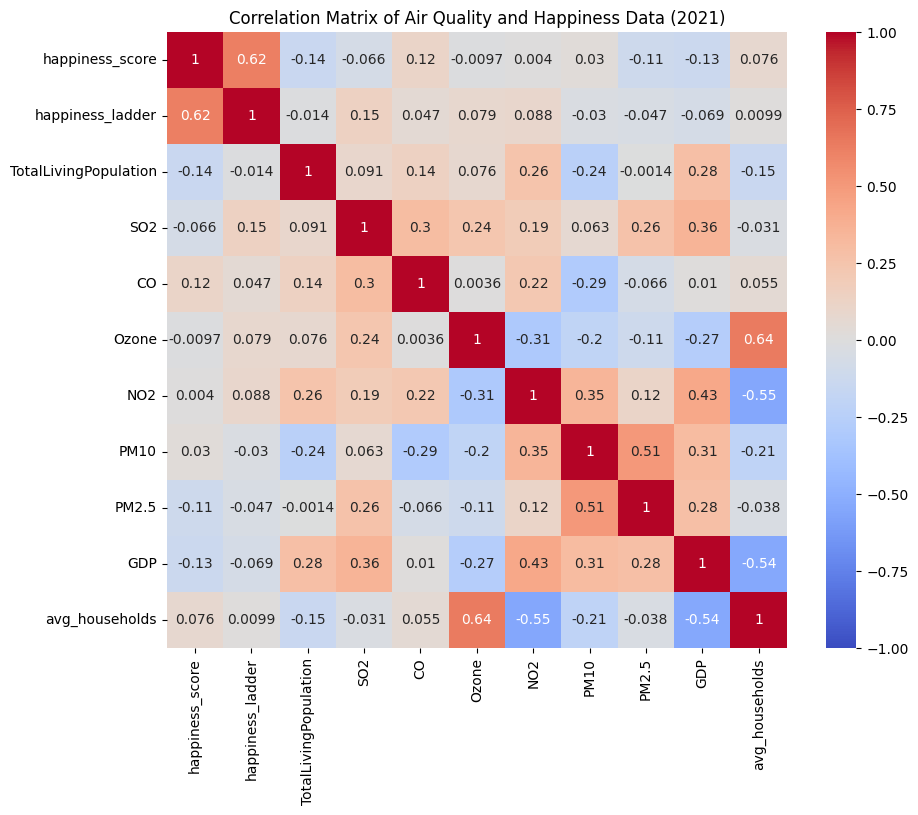

In [23]:
# Calculate the correlation matrix
correlation_matrix = ses_map2021_ownh[['happiness_score', 'happiness_ladder','TotalLivingPopulation',
        'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5', 'GDP', 'avg_households']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Air Quality and Happiness Data (2021)')
plt.show()

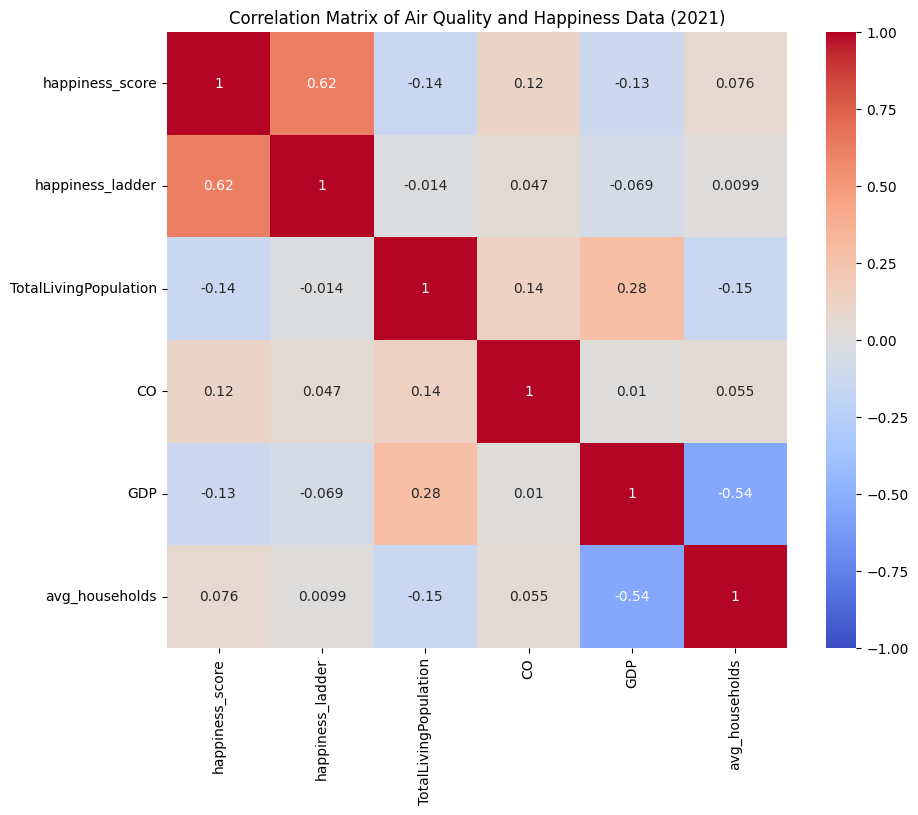

In [25]:
# Calculate the correlation matrix
correlation_matrix = ses_map2021_ownh[['happiness_score', 'happiness_ladder','TotalLivingPopulation',
                                       'CO', 'GDP', 'avg_households']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Air Quality and Happiness Data (2021)')
plt.show()

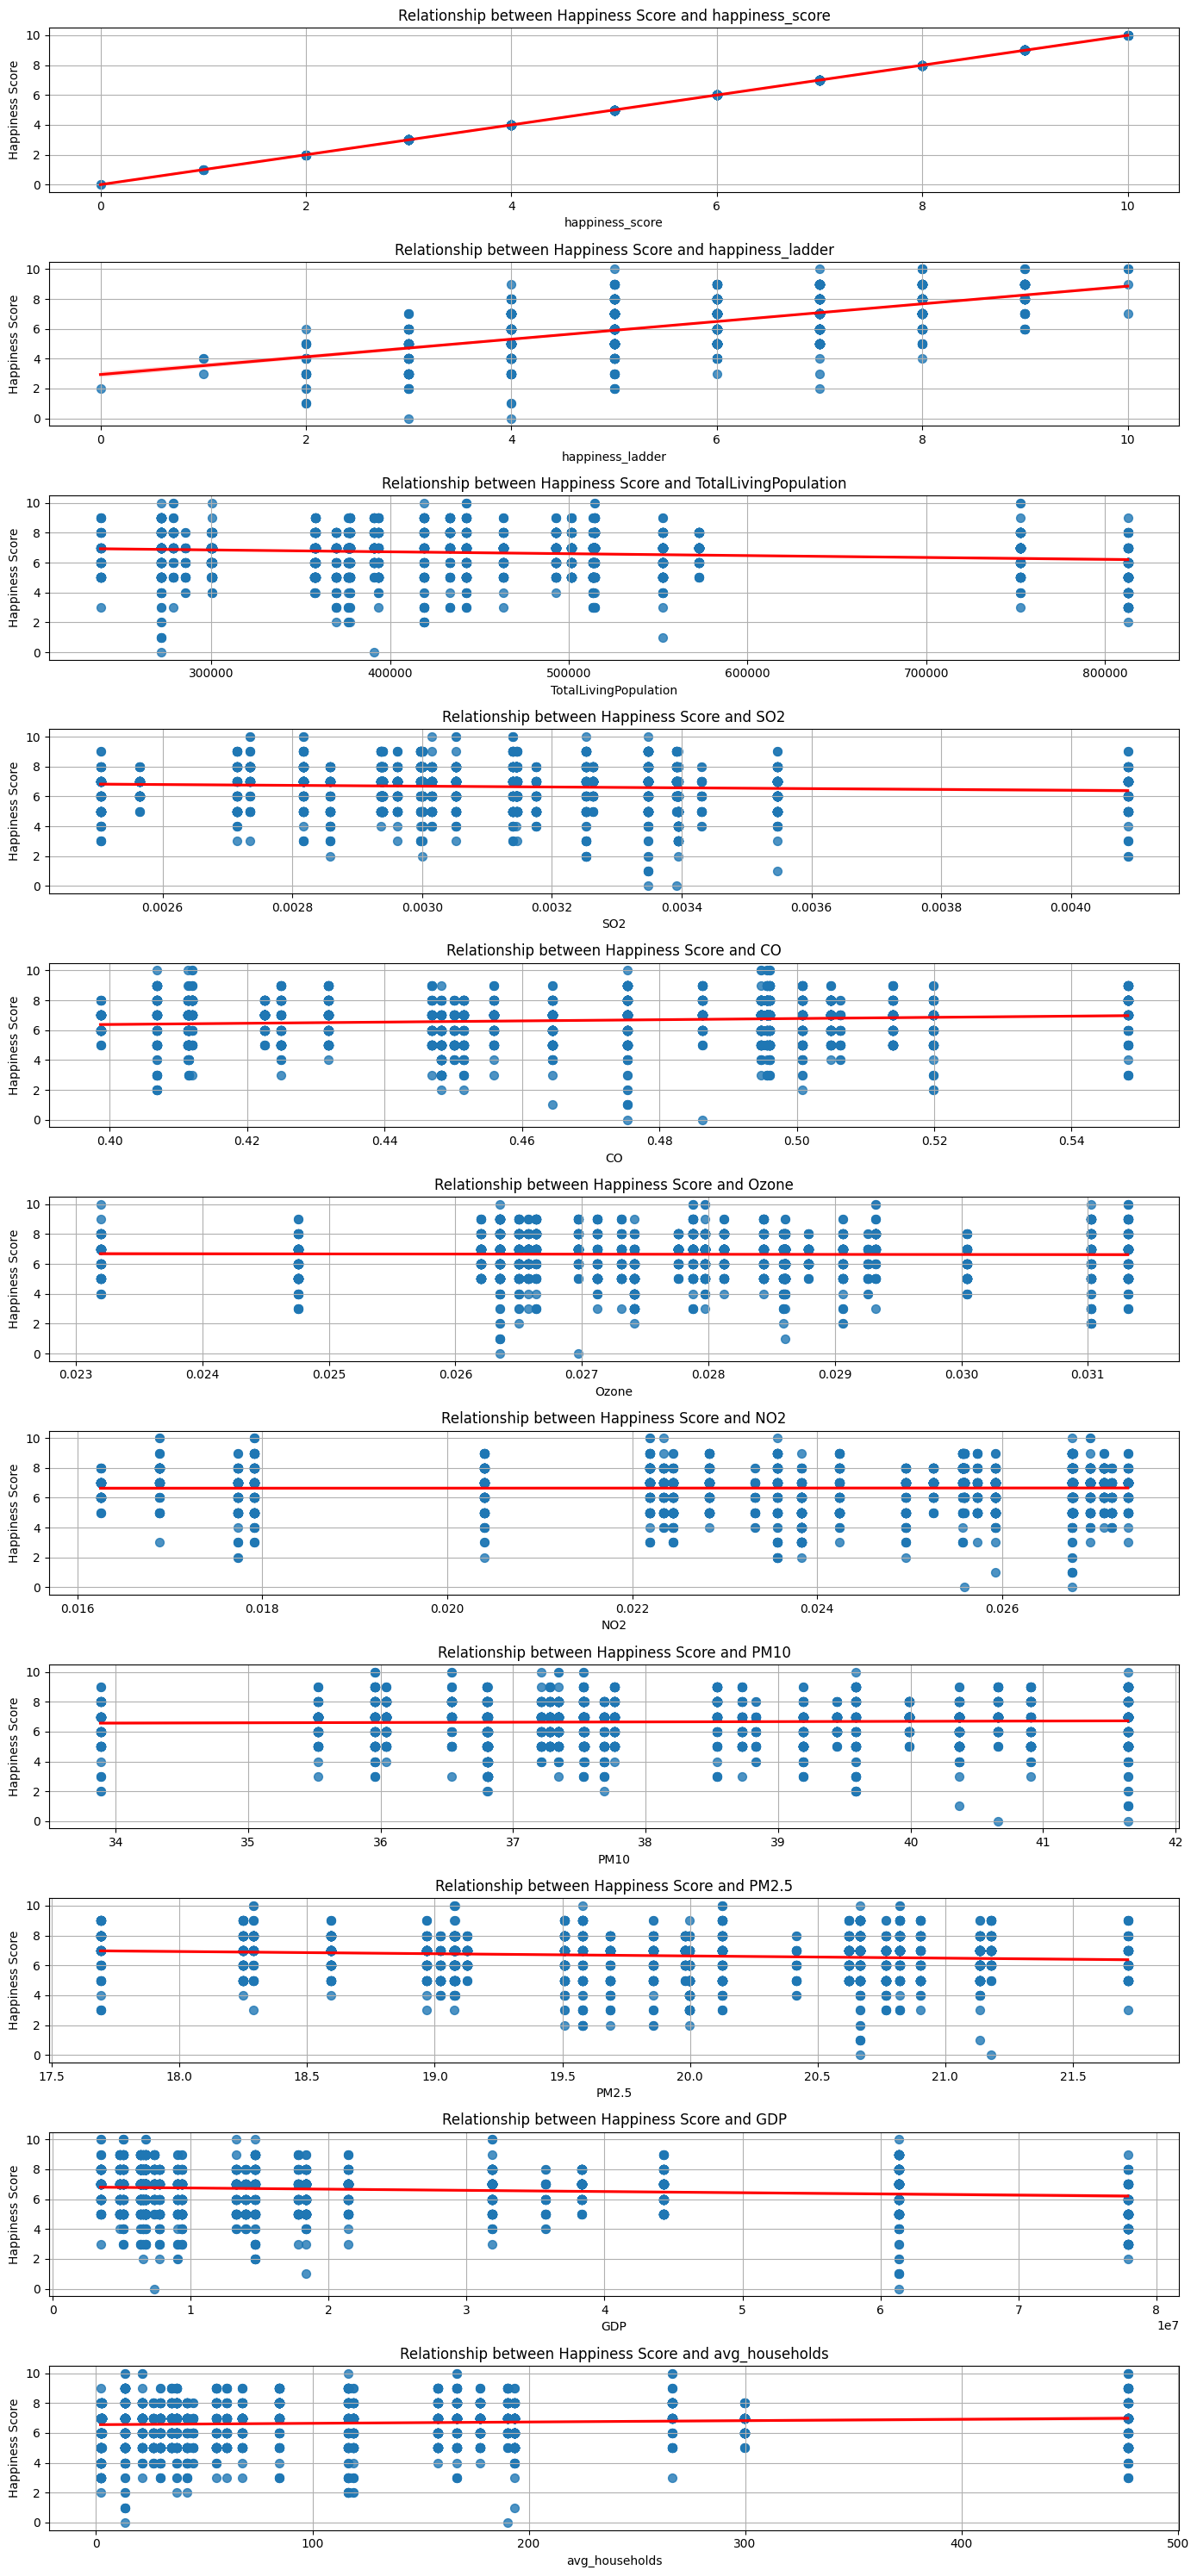

In [35]:
# Columns to plot against happiness_score
columns_to_plot = ['happiness_score', 'happiness_ladder','TotalLivingPopulation',
        'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5', 'GDP', 'avg_households']

# Create subplots
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(14, 30))

for i, column in enumerate(columns_to_plot):
    # Plot happiness_score vs column
    sns.regplot(x=column, y='happiness_score', data = ses_map2021_ownh, scatter_kws={'s': 50}, line_kws={'color': 'red'}, ax=axs[i])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Happiness Score')
    axs[i].set_title(f'Relationship between Happiness Score and {column}')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

# housing plot

In [32]:
ses_map2021_sub.columns

Index(['SGG_NM_gug', 'gungu', 'happiness_score', 'happiness_ladder',
       'TotalLivingPopulation', 'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5',
       'GDP', 'housing', 'avg_households', 'geometry'],
      dtype='object')

In [30]:
ses_map2021_sub["housing"].unique()

array(['Free', 'Lease', 'Monthly rent with deposit',
       'Monthly rent without deposit', 'Own house', 'Monthly lease'],
      dtype=object)

In [33]:
# Get unique housing types
unique_housing_types = ses_map2021_sub["housing"].unique()

# Number of unique housing types
num_housing_types = len(unique_housing_types)

# Create subplots: one for each unique housing type
fig, axes = plt.subplots(num_housing_types, 1, figsize=(10, 6 * num_housing_types))

# If there's only one unique housing type, `axes` won't be a list
if num_housing_types == 1:
    axes = [axes]

# Plot each unique housing type
for ax, housing_type in zip(axes, unique_housing_types):
    # Filter data for the current housing type
    data_to_plot = ses_map2021_sub[ses_map2021_sub["housing"] == housing_type]

    # Assuming you want to plot 'Number_Of_Households' over some index or column
    data_to_plot.plot(x='gungu', y='avg_households', kind='bar', ax=ax, title=housing_type)

    # Set axis labels
    ax.set_xlabel('Gungu')
    ax.set_ylabel('Number Of Households')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


KeyboardInterrupt: 

# SES analysis

- env: CO
- econ: GDP
- social: average number of households